In [12]:
ID: 22-46142-1
Name: Nizhum Biswas Akash
Section:B

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
def make_dataset(total_points=500):
    rng = np.random.default_rng()
    points_per_class = [167, 167, 166]
    clusters = [
        rng.normal(loc=[2.5, 2], scale=1.3, size=(points_per_class[0], 2)),
        rng.normal(loc=[6.5, 6.5], scale=1.1, size=(points_per_class[1], 2)),
        rng.normal(loc=[9.5, 2.5], scale=1.4, size=(points_per_class[2], 2))
    ]
    X = np.concatenate(clusters, axis=0)
    y = np.repeat(np.arange(len(clusters)), points_per_class)
    return X, y

In [3]:
X, y = make_dataset()

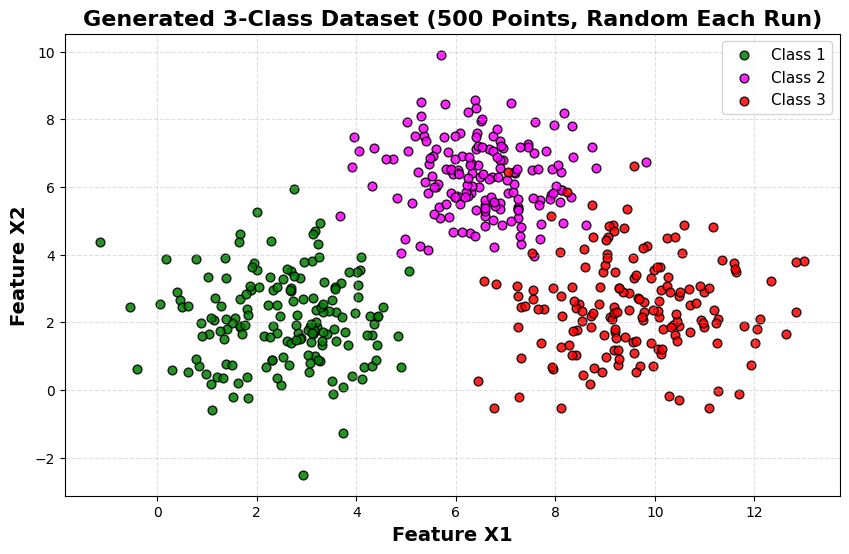

In [4]:
plt.figure(figsize=(10, 6))
rng = np.random.default_rng()
colors = rng.choice([
    "red", "green", "blue", "gold", "violet", "orange", "cyan", "magenta", "brown", "pink"
], size=len(np.unique(y)), replace=False)

for cid in np.unique(y):
    plt.scatter(X[y == cid, 0], X[y == cid, 1],
                label=f"Class {cid+1}",
                edgecolor="black", s=40, alpha=0.85, c=colors[cid])
plt.title("Generated 3-Class Dataset (500 Points, Random Each Run)", fontsize=16, weight="bold")
plt.xlabel("Feature X1", fontsize=14, weight="bold")
plt.ylabel("Feature X2", fontsize=14, weight="bold")
plt.legend(frameon=True, fontsize=11)
plt.grid(True, alpha=0.4, linestyle="--")
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

In [7]:
class ThreeLayerNN:
    def __init__(self, input_size=2, hidden_size=10, output_size=3):

        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):

        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)

        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def backward(self, X, y_onehot, learning_rate=0.01):
        m = X.shape[0]
        delta2 = self.a2 - y_onehot
        delta1 = np.dot(delta2, self.W2.T) * (self.a1 * (1 - self.a1))


        dW2 = np.dot(self.a1.T, delta2) / m
        db2 = np.sum(delta2, axis=0, keepdims=True) / m
        dW1 = np.dot(X.T, delta1) / m
        db1 = np.sum(delta1, axis=0, keepdims=True) / m


        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y_onehot, epochs=1000, learning_rate=0.01):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y_onehot, learning_rate)
            if epoch % 100 == 0:
                loss = -np.mean(np.sum(y_onehot * np.log(self.a2 + 1e-8), axis=1))
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

    def predict(self, X):
        probs = self.forward(X)
        return np.argmax(probs, axis=1)

In [8]:
nn = ThreeLayerNN(input_size=2, hidden_size=10, output_size=3)
nn.train(X_train, y_train_onehot, epochs=1000, learning_rate=0.01)

Epoch 0: Loss = 1.0984
Epoch 100: Loss = 1.0967
Epoch 200: Loss = 1.0953
Epoch 300: Loss = 1.0926
Epoch 400: Loss = 1.0876
Epoch 500: Loss = 1.0791
Epoch 600: Loss = 1.0659
Epoch 700: Loss = 1.0478
Epoch 800: Loss = 1.0250
Epoch 900: Loss = 0.9981


Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        25
           1       1.00      0.40      0.57        40
           2       0.71      1.00      0.83        35

    accuracy                           0.76       100
   macro avg       0.81      0.80      0.75       100
weighted avg       0.83      0.76      0.73       100



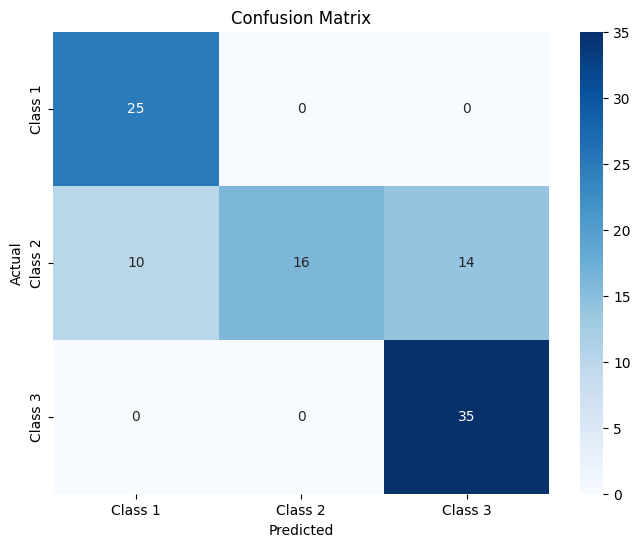

In [9]:
y_pred = nn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[f"Class {i+1}" for i in range(3)], yticklabels=[f"Class {i+1}" for i in range(3)])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()